# Deep Learning for Computer Vision:  HW 1


## Computer Science: COMS W 4995 005


### Due: September 19, 2024

#### Problem 1  (50%)

Let's start with a two class classification problem. You are asked to

1. Create your own dataset using real data. This data can be found by you online or gathered and measured by you. You are not to use datasets that others have put together, instead you are looking for raw data for a two class classification problem. The data does not have to come from images, but it is ok if it does. The data should contain 100 or more samples (more is better) from each class and the features should be at least 2 dimensional. It is ok to use Python libs, e.g. OpenCV, to extract features from your raw data. And it is ok if the labels for the classes are given by the data, or you can annotate this data yourself. 

2. Divide this data up into a training set (80%) and a test set (20%). Experiment with plotting this data in some of the raw feature dimensions much like we did in class. Hand-draw possible classifiers in these plots. 

3. Compute the prior for both classes from the data you gathered. Or if you do not believe you can determine this, assume both classes are equally likely. If you only have a couple of features, you can try to fit to a multivariate Gaussian class conditional density functions--this simply means you need to find the sample mean and sample covariance matrix for both classes from the samples. Alternatively, you can use a naive Bayes algorithm that assumes each feature is independent. But again assume a Gaussian distribution for each and find the joint probability as the product of the per feature probabilities. Plot the decision boundary for a minimum error-rate classifier assuming your fits are correct. Are these good fits to your data? How does this decision boundary differ from the one you drew by hand?

To make things more consistent, let's all use the same notation.  Let the class conditional density functions (or likelihoods) be given by $\rho({\bf x}|y_i)$ where ${\bf x}$ is your feature and $y_i$ specifies the class. Let's also assume that the priors $P(y_i)$ are the same for both classes. Hint: you can find the decision boundary by densely generating sample points ${\bf x}_j \in X$ according to your ccd's, classifying them, and then plotting and coloring them according to their predicted label.

Remember all you need to do is to use Bayes theorem to get the expression for $P(y_i|{\bf x})$, then for each sample ${\bf x}_j \in X$ choose the $i$ with the highest aposteriori probability. Do not use any statisical packages to do this other than numpy to fit to your Gaussian distribution(s).

In [181]:
from bs4 import BeautifulSoup
import requests

In [182]:
url = "https://tennisabstract.com/reports/wta_elo_ratings.html"

In [183]:
page=requests.get(url)

In [184]:
soup = BeautifulSoup(page.text, 'html')

In [185]:
print(soup.prettify())

<html>
 <head>
  <title>
   Tennis Abstract: WTA Elo Ratings
  </title>
  <link href="https://www.tennisabstract.com/blue/style.css" rel="stylesheet" type="text/css"/>
  <script src="https://www.tennisabstract.com/jquery-1.7.1-min.js" type="text/javascript">
  </script>
  <script src="https://www.tennisabstract.com/jquery.ui.core.js" type="text/javascript">
  </script>
  <script src="https://www.tennisabstract.com/jquery.ui.position.js" type="text/javascript">
  </script>
  <script src="https://www.tennisabstract.com/jquery.ui.widget.js" type="text/javascript">
  </script>
  <script src="https://www.tennisabstract.com/jquery.ui.autocomplete.js" type="text/javascript">
  </script>
  <script src="https://www.tennisabstract.com/jsplayers/mwplayerlist.js" type="text/javascript">
  </script>
  <script src="https://www.tennisabstract.com/jquery.tablesorter.js" type="text/javascript">
  </script>
  <script src="https://www.tennisabstract.com/navbar.js" type="text/javascript">
  </script>
  <s

In [188]:
#Grab the link for each player and grabs their name
players = [
    a["href"].split("p=")[1]   # take the right-hand side of "p="
    for a in soup.select("tbody tr td a")
]

In [189]:
# Initialize DataFrame
all_rows = []
columns = None  # we'll grab column names only once
num_of_headers = 0

In [ ]:
# Grab most recent match stats from each player and add to dataframe
for player in players:
    url = f"https://www.tennisabstract.com/jsfrags/{player}.js"
    resp = requests.get(url)
    resp.raise_for_status()
    time.sleep(2)
    soup = BeautifulSoup(resp.text, "html.parser")
    table = soup.select_one("table")
    
    # Grab column names only once
    if num_of_headers==0:
        thead = table.find("thead")
        columns = [th.get_text(strip=True) for th in thead.find_all("th")]
    num_of_headers=1
    
    # Grab rows for this player
    for tr in table.select("tbody tr"):
        row = [td.get_text(strip=True) for td in tr.find_all("td")]
        row.insert(0, player)  # optional: add player name as first column
        all_rows.append(row)

# Create DataFrame
df = pd.DataFrame(all_rows, columns=["Player"] + columns)  # add Player column
print(df.head())

In [160]:
df.rename(columns={"": "Match"}, inplace=True)

In [162]:
# Create the binary y variable to determine if the player won
df["Win"] = df.apply(
    lambda row: 1 if (row["Player"][-4:] + "d.") in row["Match"].replace(" ", "") else 0,
    axis=1
)

print(df[["Player", "Match", "Win"]])

              Player                                     Match  Win
0     ArynaSabalenka   (1)Sabalenkad. (8)Amanda Anisimova[USA]    1
1     ArynaSabalenka     (1)Sabalenkad. (4)Jessica Pegula[USA]    1
2     ArynaSabalenka    (1)Sabalenkad.Marketa Vondrousova[CZE]    1
3     ArynaSabalenka         (1)Sabalenkad.Cristina Bucsa[ESP]    1
4     ArynaSabalenka  (1)Sabalenkad. (31)Leylah Fernandez[CAN]    1
...              ...                                       ...  ...
9889    RinkoMatsuda                Jia Jing Lu[CHN] d.Matsuda    0
9890    RinkoMatsuda                Matsudad.Annabelle Xu[CAN]    1
9891    RinkoMatsuda                    Matsudad.Naomi Xu[CAN]    1
9892    RinkoMatsuda                   Matsudad.Ramu Ueda[JPN]    1
9893    RinkoMatsuda                 Hiromi Abe[JPN] d.Matsuda    0

[9894 rows x 3 columns]


In [165]:
import pandas as pd

# Drop rows with NaN in required columns *before conversion*
df = df.dropna(subset=["1st%", "2nd%", "A%", "DF%", "1stIn"])

# Convert percentage columns safely
df["1st%"] = pd.to_numeric(df["1st%"].str.replace("%", "", regex=False), errors="coerce")
df["2nd%"] = pd.to_numeric(df["2nd%"].str.replace("%", "", regex=False), errors="coerce")
df["A%"]   = pd.to_numeric(df["A%"].str.replace("%", "", regex=False), errors="coerce")
df["DF%"]  = pd.to_numeric(df["DF%"].str.replace("%", "", regex=False), errors="coerce")
df["1stIn"] = pd.to_numeric(df["1stIn"].str.replace("%", "", regex=False), errors="coerce")

# Now drop any rows where conversion failed (empty strings → NaN)
df = df.dropna(subset=["1st%", "2nd%", "A%", "DF%", "1stIn"])

# Check distribution of target
print(df["Win"].value_counts())
print(df["Win"].value_counts(normalize=True))

Win
1    4681
0    4642
Name: count, dtype: int64
Win
1    0.502092
0    0.497908
Name: proportion, dtype: float64


In [13]:
#upsampling Lose class bc class distribution is uneven
Win = df.loc[df["Win"] == 1, ["Win", "1st%", "2nd%"]]
Lose= df.loc[df["Win"] == 0, ["Win", "1st%", "2nd%"]]
Lose_upsampled = Lose.sample(
    n=len(Win),
    replace=True,
    random_state=42)

Lose_upsampled.count()
df = pd.concat([Win, Lose_upsampled])

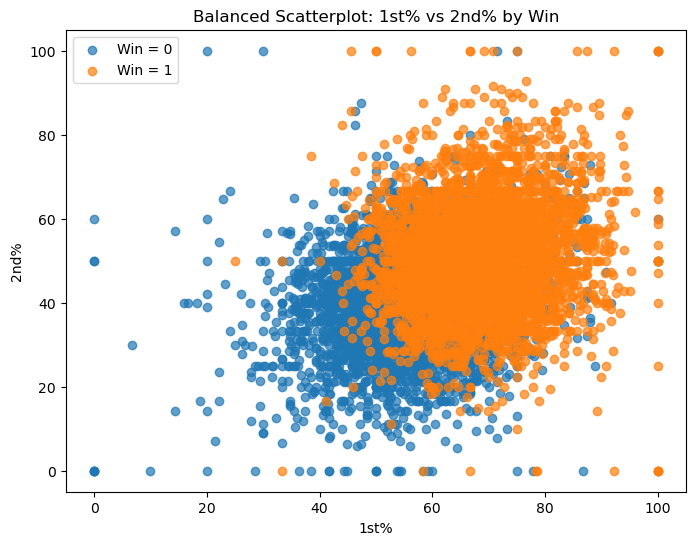

In [166]:
# Scatter plot of balanced dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
for win, group in df.groupby("Win"):
    plt.scatter(group["1st%"], group["2nd%"], label=f"Win = {win}", alpha=0.7)

plt.xlabel("1st%")
plt.ylabel("2nd%")
plt.title("Balanced Scatterplot: 1st% vs 2nd% by Win")
plt.legend()
plt.show()

In [167]:
# Features: L and W
X = df[["1st%", "2nd%"]].copy()

# Labels: Code
y = df[["Win"]].copy()

# Check the results
print("X (features):")
print(X.head())

print("\ny (labels):")
print(y.head())

X (features):
   1st%  2nd%
0  60.0  62.5
1  71.9  53.1
3  83.9  57.9
4  78.8  50.0
5  77.8  46.7

y (labels):
   Win
0    1
1    1
3    1
4    1
5    1


In [169]:
#Shuffling classes to create training and test subsets
import numpy as np
n = len(df)
test_perc = 0.20
n_test = int(test_perc * n)

indices = np.arange(n)
np.random.shuffle(indices)

test_idx = indices[:n_test]
train_idx = indices[n_test:]

# Create train/test splits
X_train = X.iloc[train_idx].reset_index(drop=True)
X_test  = X.iloc[test_idx].reset_index(drop=True)
y_train = y.iloc[train_idx].reset_index(drop=True)
y_test  = y.iloc[test_idx].reset_index(drop=True)

# Quick checks
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train counts:\n", y_train.value_counts())
print("y_test counts:\n", y_test.value_counts())

X_train shape: (7459, 2)
X_test shape: (1864, 2)
y_train counts:
 Win
1      3741
0      3718
Name: count, dtype: int64
y_test counts:
 Win
1      940
0      924
Name: count, dtype: int64


In [170]:
#Compute priors
counts = y_train["Win"].value_counts()

# Compute priors
priors = counts / len(y_train)

print("Class counts:\n", counts)
print("\nClass priors:\n", priors)

Class counts:
 Win
1    3741
0    3718
Name: count, dtype: int64

Class priors:
 Win
1    0.501542
0    0.498458
Name: count, dtype: float64


In [171]:
#Calculate Sample Mean and Sample Covariance
def mu(X): 
    return X.sum(axis=0) / len(X) #return mean vector

def cov(X, mu):
    N = X.shape[0]
    X_centered = X - mu         # subtract mean vector from each row
    covariance = (X_centered.T @ X_centered) / (N - 1)
    return covariance

mu1=mu(X_train[y_train["Win"] == 1])
print(mu1)
cov1=cov(X_train[y_train["Win"] == 1],mu1)
print(cov1)
mu2=mu(X_train[y_train["Win"] == 0])
print(mu2)
cov2=cov(X_train[y_train["Win"] == 0],mu2)
print(cov2)

1st%    68.167068
2nd%    50.849105
dtype: float64
           1st%        2nd%
1st%  89.096204   13.518511
2nd%  13.518511  151.556575
1st%    56.676278
2nd%    39.963690
dtype: float64
            1st%        2nd%
1st%  112.974525   23.248358
2nd%   23.248358  132.349120


In [172]:
def likelihood(x,mu,cov):
    mu=mu.to_numpy()
    det_Sigma = np.linalg.det(cov)
    inv_Sigma = np.linalg.inv(cov)
    d=2
    e_val=np.e
    diff = x - mu             # shape (2,)
    diff_col = diff.reshape(-1, 1)  # make it a column vector (2,1)
    diff_row = diff.reshape(1, -1)
    mahalanobis_sq = diff_row @ inv_Sigma @ diff_col
    mahalanobis_sq = mahalanobis_sq.item() 
    number=e_val**((-1/2)*mahalanobis_sq)
    sqrt=np.sqrt(((2*np.pi)**d)*det_Sigma)
    result=(1/sqrt)*number
    return result

In [173]:
def bayes_probability(X_test, mu1, cov1, mu2, cov2, priors, class1, class2):
    """
    Compute posterior probabilities P(class|x) for each sample in X_test.
    
    Parameters:
        X_test  : DataFrame or ndarray of samples (n_samples, d)
        mu1     : mean vector for class1
        cov1    : covariance matrix for class1
        mu2     : mean vector for class2
        cov2    : covariance matrix for class2
        priors  : pandas Series with class priors (index = class labels)
        class1  : label for first class (e.g. 3)
        class2  : label for second class (e.g. 13)
    
    Returns:
        probs_1 : numpy array of posterior probabilities for class1
        probs_2 : numpy array of posterior probabilities for class2
    """
    probs_1 = []
    probs_2 = []
    
    for i in range(len(X_test)):
        x = X_test.iloc[i].to_numpy() if hasattr(X_test, "iloc") else X_test[i]
        
        lik1 = likelihood(x, mu1, cov1)
        lik2 = likelihood(x, mu2, cov2)
        
        denom = lik1 * priors[class1] + lik2 * priors[class2]
        
        prob1 = (lik1 * priors[class1]) / denom
        prob2 = (lik2 * priors[class2]) / denom
        
        probs_1.append(prob1)
        probs_2.append(prob2)
    
    return np.array(probs_1), np.array(probs_2)


In [174]:
def classify(probclass1, probclass2, class1=1, class2=0):
    """
    Assign class labels based on higher posterior probability.
    
    Parameters:
        probclass1 : array of posterior probabilities for class 1
        probclass2 : array of posterior probabilities for class 2
        class1     : label for class 1 (default=1)
        class2     : label for class 2 (default=2)
    
    Returns:
        predictions : numpy array of predicted class labels
    """
    predictions = []
    for p1, p2 in zip(probclass1, probclass2):
        if p1 > p2:
            predictions.append(class1)
        else:
            predictions.append(class2)
    return np.array(predictions)

In [175]:
probs_1, probs_0 = bayes_probability(X_test, mu1, cov1, mu2, cov2, priors, 1, 0)
prediction = classify(probs_1, probs_0,1,0)

In [176]:
from sklearn.metrics import accuracy_score

# preds = predicted labels from your classify()
# y_test = true labels

accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 0.7575107296137339


In [177]:
import numpy as np

# 10,000 random points ~ N[0, 100]
X_plot = np.random.uniform(0, 100, size=(10000, 2))
print(X_plot.shape)  # (10000, 2)

(10000, 2)


In [178]:
# Get probabilities
probs_1, probs_0 = bayes_probability(X_plot, mu1, cov1, mu2, cov2, priors, 1, 0)

# Classify
preds = classify(probs_1, probs_0, 1, 0)

df_preds = pd.DataFrame(X_plot, columns=["x1", "x2"])
df_preds["pred"] = preds

print(df_preds.head())


          x1         x2  pred
0  84.463127  13.470816     1
1  66.858419  48.911431     1
2  48.315152  82.780684     1
3  37.715763  84.218295     1
4  58.697193  88.726109     1


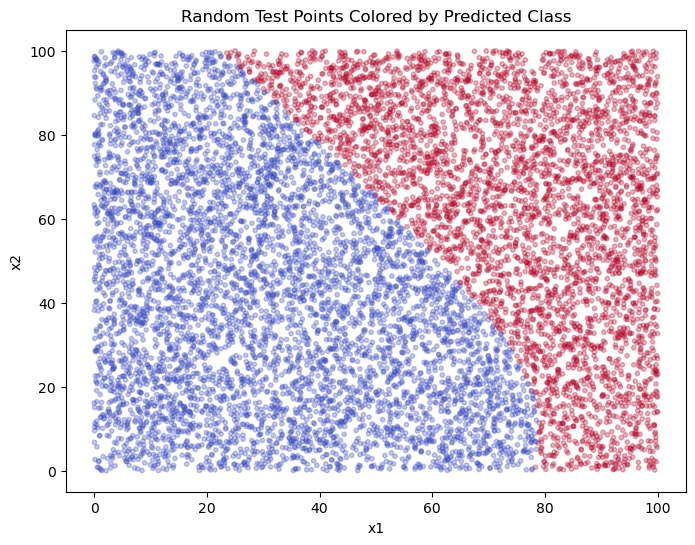

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_preds["x1"], df_preds["x2"], c=df_preds["pred"], cmap="coolwarm", alpha=0.3, s=10)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Random Test Points Colored by Predicted Class")
plt.show()


#### Problem 2  (25%)

Research an application for computer vision, describe the underlying problem and the methods used to solve it. If the application was presented in popular media (e.g., NY Times), track down the scientific methods used in the academic literature. Include references. It is ok if this is related to what you are thinking about for your final project! This write-up should be a two to three pages including images and diagrams as needed. 

#### Problem 3  (25%)

Revisit Problem 2 above. Imagine that you had to build this application yourself. Using internet searches, seek out existing pre-trained deep learning models and describe how you might use these to build a ML pipeline for your use-case. Consider GitHub, Huggingface, and tech blogs and model zoos from some of the big AI companies. Include references.
